## 데이터 로드

In [45]:
file_paths = {
    "bus_boarding_info": "버스승하차인원정보.csv",
    "bus_stop_location": "버스정류소위치정보.csv",
    "subway_congestion": "역별시간대혼잡도.csv",
    "subway_boarding_info": "지하철승하차인원정보.csv"
}

In [53]:
import pandas as pd
try:
  bus_boarding_info = pd.read_csv(file_paths["bus_boarding_info"], low_memory=False, encoding='cp949')
  bus_stop_location = pd.read_csv(file_paths["bus_stop_location"])
  subway_congestion = pd.read_csv(file_paths["subway_congestion"])
  subway_boarding_info = pd.read_csv(file_paths["subway_boarding_info"])
  # 데이터셋 확인
  print("버스 승하차 정보 열 이름:", bus_boarding_info.columns)
  print("버스 정류소 위치 정보 열 이름:", bus_stop_location.columns)
  print("지하철 혼잡도 정보 열 이름:", subway_congestion.columns)
  print("지하철 승하차 정보 열 이름:", subway_boarding_info.columns)
except FileNotFoundError as e:
  print(f"File not found: {e.filename}")

버스 승하차 정보 열 이름: Index(['사용년월', '노선번호', '노선명', '표준버스정류장ID', '버스정류장ARS번호', '역명', '24시승차총승객수',
       '24시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수',
       '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수', '교통수단타입코드',
       '교통수단타입명', '등록일자'],
      dtype='object')
버스 정류소 위치 정보 열 이름: Index(['STDR_DE', 'NODE_ID', 'STTN_NO', 'STTN_NM', 'CRDNT_X', 'CRDNT_Y',
       'STTN_TY', 'Unnamed: 7'],
      dtype='object')
지하철 혼잡도 정보 열 이름: Index(['연번', '요일구분', '호선', 

In [55]:
bus_boarding_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41810 entries, 0 to 41809
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사용년월        41810 non-null  int64 
 1   노선번호        41810 non-null  object
 2   노선명         41810 non-null  object
 3   표준버스정류장ID   41810 non-null  int64 
 4   버스정류장ARS번호  41810 non-null  object
 5   역명          41810 non-null  object
 6   24시승차총승객수   41810 non-null  int64 
 7   24시하차총승객수   41810 non-null  int64 
 8   1시승차총승객수    41810 non-null  int64 
 9   1시하차총승객수    41810 non-null  int64 
 10  2시승차총승객수    41810 non-null  int64 
 11  2시하차총승객수    41810 non-null  int64 
 12  3시승차총승객수    41810 non-null  int64 
 13  3시하차총승객수    41810 non-null  int64 
 14  4시승차총승객수    41810 non-null  int64 
 15  4시하차총승객수    41810 non-null  int64 
 16  5시승차총승객수    41810 non-null  int64 
 17  5시하차총승객수    41810 non-null  int64 
 18  6시승차총승객수    41810 non-null  int64 
 19  6시하차총승객수    41810 non-null  int64 
 20  7시승차총승

## 데이터 전처리

In [56]:
# 버스 승하차 정보 데이터 전처리
bus_boarding_info.fillna(0, inplace=True)  # 결측치 0으로 대체

# 버스 정류소 위치 정보 데이터 전처리
bus_stop_location.dropna(subset=['STTN_NM', 'STTN_NO'], inplace=True)  # 주요 열의 결측치 제거

# 지하철 혼잡도 정보 데이터 전처리
subway_congestion.fillna(0, inplace=True)  # 결측치 0으로 대체

# 지하철 승하차 정보 데이터 전처리
subway_boarding_info.fillna(0, inplace=True)  # 결측치 0으로 대체

In [57]:
# 데이터셋 전처리 확인
print("버스 승하차 정보:", bus_boarding_info.head())
print("버스 정류소 위치 정보:", bus_stop_location.head())
print("지하철 혼잡도 정보:", subway_congestion.head())
print("지하철 승하차 정보:", subway_boarding_info.head())

버스 승하차 정보:      사용년월 노선번호                    노선명  표준버스정류장ID 버스정류장ARS번호  \
0  202404  N37  N37번(진관공영차고지~송파공영차고지)  100000001       1001   
1  202404  470       470번(상암차고지~안골마을)  100000001       1001   
2  202404  741      741번(진관차고지~헌인릉입구)  100000001       1001   
3  202404  N37  N37번(송파공영차고지~진관공영차고지)  100000001       1001   
4  202404  100         100번(하계동~용산구청)  100000002       1002   

                   역명  24시승차총승객수  24시하차총승객수  1시승차총승객수  1시하차총승객수  ...  \
0      종로2가사거리(00089)          0          0         0         0  ...   
1      종로2가사거리(00066)         80        140         3         0  ...   
2      종로2가사거리(00075)        152        112       127       130  ...   
3      종로2가사거리(00032)          6         24       228       195  ...   
4  창경궁.서울대학교병원(00031)          0          0         0         0  ...   

   20시하차총승객수  21시승차총승객수  21시하차총승객수  22시승차총승객수  22시하차총승객수  23시승차총승객수  \
0          0          0          0          0          0          0   
1        330        421        297 

혼잡도 분석

버스 승하차 정보 열 이름: Index(['사용년월', '노선번호', '노선명', '표준버스정류장ID', '버스정류장ARS번호', '역명', '24시승차총승객수',
       '24시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수',
       '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수', '교통수단타입코드',
       '교통수단타입명', '등록일자'],
      dtype='object')
     사용년월 노선번호                    노선명  표준버스정류장ID 버스정류장ARS번호  \
0  202404  N37  N37번(진관공영차고지~송파공영차고지)  100000001       1001   
1  202404  470       470번(상암차고지~안골마을)  100000001       1001   
2 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

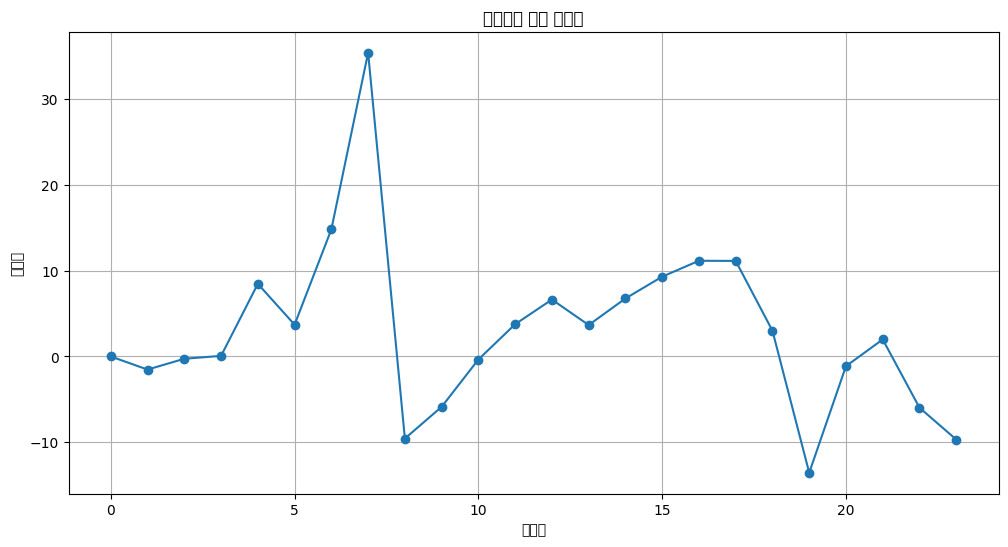

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = "버스승하차인원정보.csv"

# 데이터 로드
bus_boarding_info = pd.read_csv(file_path, low_memory=False, encoding='cp949')

# 데이터셋 확인
print("버스 승하차 정보 열 이름:", bus_boarding_info.columns)
print(bus_boarding_info.head())

# 시간대별 승차 및 하차 총 승객 수 열 이름 확인
boarding_columns = [col for col in bus_boarding_info.columns if '승차총승객수' in col]
alighting_columns = [col for col in bus_boarding_info.columns if '하차총승객수' in col]

# 각 열 이름에서 시간대 추출
time_columns = [int(col.split('시')[0]) for col in boarding_columns]

# 시간대별로 승차 및 하차 인원 합산
bus_boarding_info['총승차인원'] = bus_boarding_info[boarding_columns].sum(axis=1)
bus_boarding_info['총하차인원'] = bus_boarding_info[alighting_columns].sum(axis=1)

# 시간대별 혼잡도 계산 (승차인원 - 하차인원)
bus_boarding_info['혼잡도'] = bus_boarding_info['총승차인원'] - bus_boarding_info['총하차인원']

# 시간대별 혼잡도 평균 계산
congestion_by_time = []
for hour in range(24):  # 0시부터 23시까지
    boarding_col = f"{hour}시승차총승객수"
    alighting_col = f"{hour}시하차총승객수"
    if boarding_col in bus_boarding_info.columns and alighting_col in bus_boarding_info.columns:
        mean_congestion = bus_boarding_info[boarding_col].mean() - bus_boarding_info[alighting_col].mean()
        congestion_by_time.append(mean_congestion)
    else:
        congestion_by_time.append(0)

# 시간대별 혼잡도 데이터프레임 생성
bus_congestion_by_time = pd.DataFrame({
    '시간대': range(24),
    '혼잡도': congestion_by_time
})

# 시간대별 버스 혼잡도 시각화
plt.figure(figsize=(12, 6))
plt.plot(bus_congestion_by_time['시간대'], bus_congestion_by_time['혼잡도'], marker='o')
plt.title('시간대별 버스 혼잡도')
plt.xlabel('시간대')
plt.ylabel('혼잡도')
plt.grid(True)
plt.show()


지하철 승하차 정보 열 이름: Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자'],
      dtype='object')
      사용월  호선명 지하철역  04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  05시-06시 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

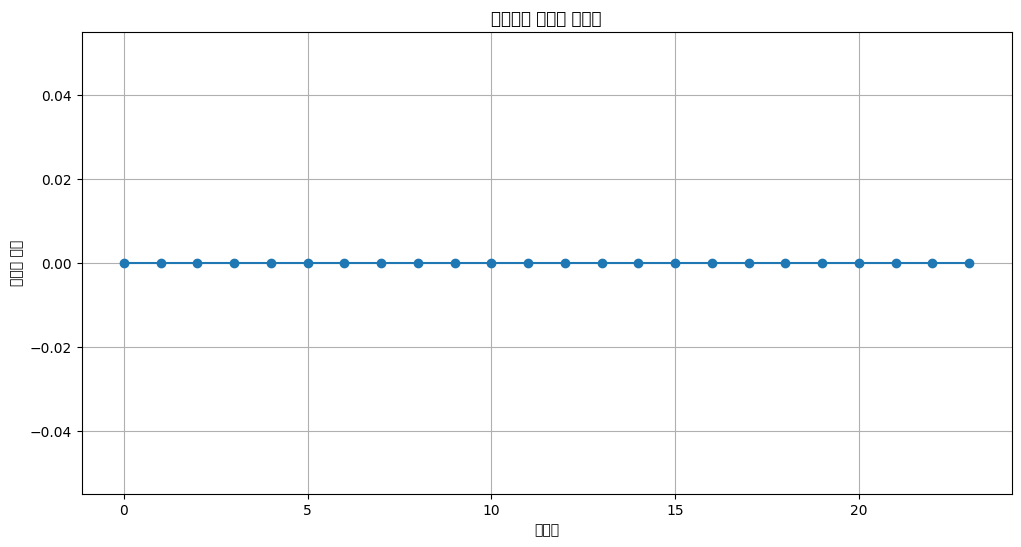

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = "지하철승하차인원정보.csv"

# 데이터 로드
subway_boarding_info = pd.read_csv(file_path)

# 데이터셋 확인
print("지하철 승하차 정보 열 이름:", subway_boarding_info.columns)
print(subway_boarding_info.head())

# 시간대별 승차 및 하차 총 승객 수 열 이름 확인
boarding_columns = [col for col in subway_boarding_info.columns if '승차' in col]
alighting_columns = [col for col in subway_boarding_info.columns if '하차' in col]

# 각 열 이름에서 시간대 추출
time_columns = [int(col.split('시')[0]) for col in boarding_columns]

# 시간대별로 승차 및 하차 인원 합산
congestion_by_time = []
for hour in range(24):
    boarding_col = f"{str(hour).zfill(2)}시 승차인원"
    alighting_col = f"{str(hour).zfill(2)}시 하차인원"
    if boarding_col in subway_boarding_info.columns and alighting_col in subway_boarding_info.columns:
        mean_congestion = subway_boarding_info[boarding_col].sum() - subway_boarding_info[alighting_col].sum()
        congestion_by_time.append(mean_congestion)
    else:
        congestion_by_time.append(0)

# 시간대별 혼잡도 데이터프레임 생성
subway_congestion_by_time = pd.DataFrame({
    '시간대': range(24),
    '혼잡도': congestion_by_time
})

# 시간대별 지하철 혼잡도 시각화
plt.figure(figsize=(12, 6))
plt.plot(subway_congestion_by_time['시간대'], subway_congestion_by_time['혼잡도'], marker='o')
plt.title('시간대별 지하철 혼잡도')
plt.xlabel('시간대')
plt.ylabel('혼잡도 지수')
plt.grid(True)
plt.show()
# 얘 문제임 시간 못읽음